# Chapter 04. 신경망 학습

신경망 학습에 대해 배운다.

학습이란? 데이터로부터 가중치 매개변수의 최적값을 자동으로 얻는것

신경망이 학습할 수 있도록 하는 **지표** 인 **손실 함수(Loss Function)** 소개한다.

학습 목표: 손실함수의 결괏값을 가장 작게하는 가중치 매개변수를 찾는 것

손실 함수의 값을 작게 만드는 기법으로 **경사 하강법(Gradient Descent)** 가 있다.

## 4.1 데이터에서 학습한다!

신경망의 특징: 데이터를 보고 학습한다. $\rightarrow$ 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다.

### 4.1.1 데이터 주도 학습
기계학습에서 **데이터**는 매우 중요

문제를 풀때, 특히 패턴을 찾을 때, 
- **사람**은 경험, 직관을 이용하여 시행착오를 거듭하면서 문제 해결을 진행
- **기계학습**은 사람 개입을 최소화, 수집한 데이터로 부터 패턴을 찾으려 시도
- **신경망, 딥러닝**은 기계학습 보다 더 사랑ㅁ의 개입을 배제

e.g) MNIST 문제를 풀때 Algorithm or program을 처음부터 만들기 어려워 $\rightarrow$ image에서 **특징** 추출, 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있다.

- 특징(feature): 입력 데이터에서 본질적인 데이터(중요한 데이터) 추출하는 **변환기**, 이 특징은 **벡터(vector)** 로 기술
    - Computer Vision 분야에서는 SIFT, SURF, HOG 등 특징 활용

특징을 사용해 데이터를 벡터로 변환, 이 변환된 데이터를 지도학습 대표 기법인 SVM, KNN 등으로 학습 가능하다.

모아진 데이터를 기계가 규칙을 찾는다. 처음부터 Algorithm을 설계하는 것보다 효율이 좋지만, 이 **특징** 을 **사람이 설계(개입)**, 문제에 따라 사람이 특징을 생각해야 한다.

문제 $\rightarrow$ 사람이 생각한 Algorithm $\rightarrow$ 결과

$(개선)\Rightarrow$ 문제 $\rightarrow$ 사람이 생각한 특징(SIFT, SURF, HOG etc...) $\rightarrow$ 기계학습(SVM, KNN) $\rightarrow$ 결과

$(개선)\Rightarrow$ 문제 $\rightarrow$ 신경망(딥러닝) $\rightarrow$ 결과

신경망(딥러닝)에서는 이미지를 '있는 그대로' 학습, 특징까지 기계가 스스로 학습(기계학습, 신경망(딥러닝) 과정에서는 사람의 개입이 없다.)

cf) 딥러닝을 **종단간 기계학습(end-to-end machine learning)** 이라고도 함 $\Rightarrow$ 데이터(입력)부터 결과(출력)까지 사람의 개입이 없다.

**신경망의 이점**: 모든 문제 같은 맥락에서 푼다 $\Rightarrow$ 모든 문제를 주어진 데이터 그대로 사용, 입력 데이터 활용 'end-to-end'로 학습 가능

### 4.1.2 훈련 데이터와 시험 데이터

기계학습에서는 데이터를 훈련 데이터와 시험 데이터로 나눈다. 

Why Split? **범용 능력** 평가를 위해 
- 범용 능력: 아직 보지 못한 data(training data에 없는)로 문제를 옳바르게 풀어내는 능력

한 데이터에만 지나치게  최적화 된 상태: **오버피팅(overfitting)**

## 4.2 손실 함수(Loss Function)

신경망 학습에서 현재 상태를 '하나의 지표'로 표현, 이 지표를 가장 좋게 하는 가중치 매개변수 값을 탐색하는 것이 목적

**손실 함수**: 신경망 학습에 사용되는 지표

일반적으로 손실함수로 "오차제곱합", "교차 엔트로피 오차" 를 사용

### 4.2.1 오차제곱합(Sum of Squares Error, SSE)

가장 많이 사용하는 손실 함수 오차제곱합(Sum of Squares Error, SSE)

각 원소의 출력(추정값)과 정답 레이블(참 값)의 차($y_k - t_k$)를 제곱(Squares) 후, 그 총합($\sum$)

- $E = \frac{1}{2} \sum_{k}(y_k - t_k)^2$
    - $y_k$: 신경망의 출력(신경망이 추정한 값)
    - $t_k$: 정답 레이블(One-hot-encoding)
    - $k$: 데이터의 차원 수
    - 신경망 출력 $y$는 Softmax function의 출력(확률로 해석 가능)

In [1]:
import numpy as np
import pandas as pd
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [2]:
def sum_squares_error(y, t):
    return 0.5 * np.sum((y - t)**2)

In [3]:
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum_squares_error(np.array(y), np.array(t))

0.5975

오차가 작은 0.097이 정답에 더 가깝다.

### 4.2.2 교차 엔트로피 오차(Cross-Entropy Error, CEE)

CEE도 자주 사용

- $E = -\sum_k t_k \log{y_k}$
    - $y_k$: 신경망의 출력
    - $t_k$: 정답 레이블(One-Hot-Encoding)

$\Rightarrow$ 실질적으로 정답 시의 추정($t_k = 1$일때의 $y_k$) (y_k는 확률적인 값이고 그 값들의 총합은 1이다 (Softmax function의 출력이기때문에) $t_k$는 one-hot-encoding되어 정답 레이블인데 정답은 1 나머지는 0으로 수식에서 계산되면 정답 외의 값들은 0으로 처리된다.)

$\Rightarrow$ 교차 엔트로피 오차는 정답일때 **출력이 전체 값을 정한다.**
($y_k$의 값이 작다(확률이 작다)면 log가 취해서 전체 CEE의 값 자체가 커진다  $\rightarrow$ 오차가 커진다.)

/home/minsungkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


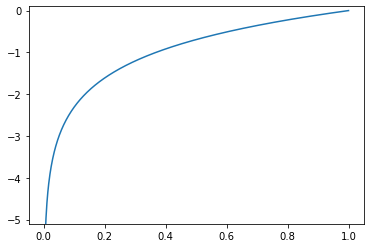

In [5]:
import matplotlib.pyplot as plt

x = np.arange(0.0, 1.0, 0.001)
y = np.log(x)
plt.plot(x, y)
plt.ylim(-5.1, 0.1)  # y축의 범위를 지정
plt.show()

정답일 때의 출력(확률로 해석)이 작아질수록 오차는 커진다.

In [6]:
def cross_entropy_error(y, t):
    delta = 1e-7  # log 0은 -inf로 발산하게 되므로 아주 작은 값을 더했다.
    return -np.sum(t * np.log(y + delta))

In [7]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
print(cross_entropy_error(np.array(y), np.array(t)))
# 첫번째 결괏값이 더 작다(오차가 작다). 정답일 가능성이 높다고 판단.

0.510825457099338
2.302584092994546


### 4.2.3 미니배치 학습

기계학습 문제는 훈련 데이터에 대한 손실 함수의 값을 구하고 그 값을 최소화하는 매개변수를 찾는다. $\rightarrow$ 결국, 모든 훈련 데이터에 대한 손실 함수를 구해야한다.

- $E = -\sum_k t_k \log{y_k}$ (데이터 1개에 대한 Loss Function)
    - $y_k$: 신경망의 출력
    - $t_k$: 정답 레이블(One-Hot-Encoding)

(N개의 데이터로 확장, N으로 나누어 정규화) $\Rightarrow$

- $E = -\frac{1}{N}\sum_{n} \sum_k t_k \log{y_k}$ 
    - $y_k$: 신경망의 출력
    - $t_k$: 정답 레이블(One-Hot-Encoding)

N으로 나눠 **평균 손실 함수** 구해, But! 데이터가 커지면 시간 오래 걸린다.

$\Rightarrow$ 데이터 일부 추려 **근사치**를 이용 (일부: 미니배치(Mini-batch))

**미니배치 학습**: Training data 중 무작위로 뽑아 학습하는 것

In [8]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
import pickle

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)  # 훈련 데이터 60,000개, 입력 데이터 784(28 x 28)
print(t_train.shape)  # 정답 레이블 (0 ~ 9)

ValueError: unsupported pickle protocol: 5

In [ ]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # 0 ~ train_size(60,000)에서 무작위로 batch_size(10)개를 뽑음
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### 4.2.4 (배치용) 교차 엔트로피 오차 구하기

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, t.size)
        
        batch_size = y.shape[0]
        return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [ ]:
# 정답 레이블이 '2', '7'과 같이 주어졌을 때, cross-entropy error

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
        batch_size = y.shape[0]
        return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 4.2.5 왜 손실함수를 설정하는가?

왜 손실함수 사용, '정확도'라는 지표를 놔두고 우회적인 방법을 사용?

정확도를 지표로 하면 매개변수의 미분이 대부분 장소에서 0이되기 때문

정확도 지표를 사용시 매개변수의 미분이 대부분 0인 이유?

만약 MNIST와 같은 이미지 데이터에서 100장의 training data 중 32장 올바르게 인식 $\rightarrow$ 정확도: 32%

if 정확도 지표를 사용시, 매개변수 값 조금 변해도 그대로 32%이다. 개선된다고 해도 연속적인 값이 아닌 불연속적 값이 나오기때문

신경망 학습서 손실함수의 미분하여 매개변수 값을 서서히 갱신하는 과정을 반복
- 미분 값이 음수 $\rightarrow$ 가중치 매개변수를 양의 방향으로 변화시켜 loss function 값을 줄인다.
- 미분 값이 양수 $\rightarrow$ 가중치 매개변수를 음의 방향으로 변화시켜 loss function 값을 줄인다.
- 미분 값이 0이면 $\rightarrow$ 갱신 Stop

정확도는 **매개변수의 미소한 변화에는 거의 반응하지 못한다.** 반응하더라도 불연속적 변화 (활성화 함수로 step function을 사용하지 않는 이유와 유사)

## 4.3 수치 미분

경사법에서 **기울기**(경사) 값을 기준으로 나아갈 방향을 정한다.

### 4.3.1 미분
미분: 한 순간의 변화량(순간 변화량)

$\frac{df(x)}{dx} = \lim_{x\to0} \frac{f(x+h) - f(x)}{h}$

In [9]:
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

h에 최대한 작은 값을 대입 위해 h = 1e-50 하지만, **반올림 오차(rounding error)** 문제 발생

In [10]:
# 반올림 오차 
np.float32(1e-50)  # 0.0으로 출력

0.0

$10^{-4}$ 정도 값 사용 시 좋은 결과 얻는다고 알려져 있다.

$f$의 차분

$f(x+h) - f(x)$는 $x+h$ 와 $x$ 사이의 차분

**진정한 미분**: $x$ 위치에서 함수의 기울기(접선), 위 코드는 $(x_h)$와 $x$ 사이의 기울기에 해당

h를 무한히 0으로 좁히는 것이 불가능하기에 생기는 한계

**수치 미분**에는 **오차**가 포함된다. 이 오차를 줄이기 위해 $(x+h)$와 $(x-h)$일때 함수 $f$의 차분을 계산하는 방법도 쓰인다.

이 차분은 $x$를 중심으로 그 전후의 차분을 계산한다는 의미에서 **중심 차분** or **중앙 차분**이라 한다. ($(x+h)$와 $x$의 차분을 **전방 차분**이라고 한다.)

In [11]:
# 개선

def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

- **수치 미분**: 차분으로 미분을 하는 것, 오차가 포함
- **해적적 미분**: 수식을 전개하여 미분하는 것, 오차가 포함되지 않음, 진정한 미분

### 4.3.2 수치 미분의 예
$y = 0.01x^2 + 0.1x$

In [12]:
def function_1(x):
    return 0.01 * x**2  + 0.1 * x

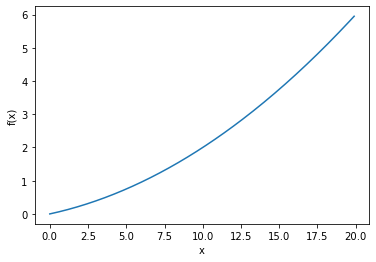

In [13]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [14]:
print(numerical_diff(function_1, 5))  # x = 5
print(numerical_diff(function_1, 10))  # x = 10

0.1999999999990898
0.2999999999986347


### 4.3.3 편미분

**편미분**: 변수가 여럿인 함수에 대한 미분

$f(x_0, x_1) = x_0^2 + x_1^2$

In [15]:
def function_2(x):
    return x[0]**2 + x[1]**2  # np.sum(x**2)

## 4.4 기울기

**기울기(Gradient)**: $(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1})$ 처럼 모든 변수의 편미분을 벡터로 정리한 것

In [16]:
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]  
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

In [17]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


**기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향**

### 4.4.1 경사법(경사 하강법)

경사법: 기울기 이용 손실함수의 min(or max)를 찾으려는 것

기울기는 각 지점에서 함수값을 줄이는 방안을 제시하는 지표, 하지만, 실제로 방향이 맞는지는 보장 못한다.

함수가 극대, 극소, **안장점(saddle point)** 에서 기울기가 **0**이다. 
- 극솟값: 국소적인 최솟값, 한정된 범위에서의 최솟값인 점
- 안정점: 어느방향에서는 최솟값, 어느 방향에서는 극댓값이 되는 점

$\rightarrow$ 기울기 0이라고 해서 최솟값이라고 할 수 **없다**. 그점이 극솟값이나 안장점일 수 도 있기때문이다.

경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다. 그리고 다음 이동한 곳에서 다시 기울기 구하고, 또 기울어진 방향으로 이동 반복
- 경사 하강법(Gradient Descent): 최솟값을 찾음
- 경사 상승법(Gradient Ascent): 최댓값을 찾음

- $x_0 = x_0 - \eta \frac{\partial f}{\partial x_0}$
- $x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}$

$\eta$(eta, 에타): **학습률(learning rate)** : 매개변수의 값을 얼마나 갱신하느냐

In [18]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

- f: 최적화하려는 함수
- init_x: 초깃값
- lr: learning rate
- step_num: 경사법에 따른 반복 횟수

경사법으로 $f(x_0, x_1) = x_0^2 + x_1^2$의 최솟값 구하기

In [19]:
def function_2(x):
    return np.sum(x**2)

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=0.1, step_num = 100)

array([-6.11110793e-10,  8.14814391e-10])

거의 (0, 0)에 가까운 결과, 실제 최솟값은 (0, 0)이므로 거의 정확한 결과

In [20]:
# 학습률이 너무 큰 예
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, lr=10.0, step_num = 100))

# 학습률이 너무 작은 예
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, lr=1e-10, step_num = 100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


학습률이 너무 크면 발산, 너무 작으면 거의 갱신되지 않고 끝난다.

learning rate와 같은 파라메터를 **하이퍼파라미터(hyperparameter)** 라고 한다. 이 하이퍼파라미터는 사람이 직접 설정해야 하며, 여러 하이퍼파리미터 후보 값 중 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 한다.

### 4.4.2 신경망에서 기울기

간단한 신경망을 예로 들어 실제로 기울기를 구하는 코드 구현

In [7]:
import sys, os
sys.path.append(os.pardir)
import numpy as np

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def cross_entropy_error(y, t):
    delta = 1e-7  # log 0은 -inf로 발산하게 되므로 아주 작은 값을 더했다.
    return -np.sum(t * np.log(y + delta))

def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad    

In [8]:
class SimpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)  # 정규분포로 초기화
        
    def predict(self, x):
        """예측을 수행하는 메서드"""
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        """손실 함수의 값 구하는 메서드"""
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [9]:
net = SimpleNet()
print(net.W)

[[-0.17810556 -2.06523344 -0.74287464]
 [-0.79707693 -0.23879957  0.64481973]]


In [10]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

print(np.argmax(p))  # p의 최댓값

t = np.array([0, 0, 1])  # 정답 레이블
net.loss(x, t)

[-0.82423257 -1.45405968  0.13461297]
2


0.4621802269922537

In [11]:
def f(W):
    return net.loss(x, t)

In [12]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.14487967  0.07717507 -0.22205474]
 [ 0.21731951  0.1157626  -0.33308211]]


In [13]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

## 4.5 학습 알고리즘 구현하기

- 전제: 신경망엔 적응 가능한 가중치와 편향있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라고 한다. 4단계로 구성

1단계 - 미니배치

- 훈련 데이터 중 일부를 무작위로 가져옴, 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 주이는 것을 목표로 한다.

2단계 - 기울기 산출

- 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.

3단계 - 매개변수 갱신

- 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.

4단계 - 반복

- 1~3 단계를 반복한다.

위 단계는 경사 하강법으로 매개변수를 갱신하는 방법이다. 이때 데이터를 미니배치로 무작위로 선정하기 때문에 **확률적 경사 하강법(Stochastic gradient descent)** 라고 부른다.



In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
# MNIST 사용, 2층 신경망 구현(은닉층 1개인 네트워크)

import sys, os
sys.path.append(os.pardir)

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = sigmoid(a2)
        
        return y
    
    # x: 입력 데이터, y: 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(y, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
 
        return grads

TwoLayerNet class가 사용하는 변수
- params: 신경망의 매개변수를 보관하는 dict변수(인스턴스 변수)
    - params['W1']: 1번째 층의 가중치, params['b1']: 1번째 층의 편향
    - params['W2']: 2번째 층의 가중치, params['b2']: 2번째 층의 편향

- grads: 기울기를 보관하는 dict변수(numerical_gradient() 메서드의 반환 값)
    - grads['W1']: 1번째 층의 가중치의 기울기, grads['b1']: 1번째 층의 편향의 기울기
    - grads['W2']: 2번째 층의 가중치의 기울기, grads['b2']: 2번째 층의 편향의 기울기
    
    
TwoLayerNet class가 사용하는 메서드
- \__init__(self, input_size, hidden_size, output_size): 초기화를 수행, 인수는 순서대로 **입력층의 뉴런의 수, 은닉층의 뉴런의 수, 출력층의 뉴런의 수**
- predidct(self, x): 예측(추론)을 수행, 인수 x는 이미지 데이터
- loss(self, x, t): 손실함수의 값을 구한다. 인수 x는 이미지 데이터, t는 정답 레이블
- accuracy(self, x, t): 정확도를 구한다.
- numerical_gradient(self, x, t): 가중치 매개변수의 기울기를 구한다.
- gradient(self, x, t): 가중치 매개변수의 기울기를 구한다. numerical_gradient()의 성능 개선판, 구현은 다음장에..

In [16]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


params 변수에는 신경망에 필요한 매개변수가 모두 저장됩니다. params 변수에 저장된 가중치 매개변수가 예측 처리(순방향 처리)에서 사용됩니다. 

In [17]:
x = np.random.rand(100, 784)
t = net.predict(x)

grads 변수에는 params 변수에 대응하는 각 매개변수의 기울기가 저장된다. 

In [18]:
x = np.random.rand(100, 784)  # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10)  # 더미 정답 레이블(100장 분량)

grads = net.numerical_gradient(x, t)  # 기울기 계산

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


\__init__(self, input_size, hidden_size, output_size): 클래스 초기화 (초기화 메서드는 TwoLayerNet을 생성할 때 불리는 메서드)

가중치 초기화 메서드에서는 가중치 매개변수도 초기화 한다. 가중치 매개변수의 초깃값을 무엇으로 설정하냐가 신경망 학습의 성공을 좌우하기도 한다.

정규분포를 따르는 난수로, 편향은 0으로 초기화 한다.

numerical_gradient(self, x, t)는 **수치 미분 방식** 매개변수의 기울기를 계산, 이 기울기를 고속으로 수행하는 방법은 **오차역전파법**이다. 오차역전파법은 수치 미분을 사용할 때와 거의 같은 결과를 훨씬 빠르게 얻을 수 있다. 

### 4.5.2 미니배치 학습 구현하기

In [ ]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# hyperparameter
iters_num = 10000 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

### 4.5.3 시험 데이터로 평가하기

손실함수의 값이란, 정확히는 **'훈련 데이터의 미니배치에 대한 손실 함수'의 값**

훈현 데이터의 손실 함수의 값이 작아지는 것은 신경망이 잘 학습하고 있다는 방증이지만, 이 결과만으로는 다른 데이터셋에도 비슷한 실력을 발휘하는 지 확실하지 않다.

신경망 학습에는 훈련 데이터 외의 데이터를 올바르게 인식하는지를 확인해야한다. 즉, '오버피팅'을 확인해야 한다. 

신경망 학습의 **목표**는 **범용적인 능력**을 익히는 것.

범용 능력을 평가하려면 훈련 데이터에 포함되지 않는 데이터를 사용해 평가해봐야한다. 

**에폭(epoch)**: 하나의 단위, **1에폭**은 **학습에서 훈련 데이터를 모두 소진했을 때의 횟수**에 해당합니다. 

e.g) 훈련 데이터 10,000개를 100개의 미니배치로 학습할 경우, 확률적 경사 하강법을 100회 반복하면 모든 훈련 데이터를 '소진'하게 된다. 이 경우 100회가 1에폭이 된다.


In [ ]:
import numpy as np

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# hyperparameter
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100  # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learing_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuarcy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

## 4.6 정리
신경망이 학습을 수행할 수 있도록 손실 함수라는 '지표'를 도입, 이 손실 함수를 기준으로 그 값이 가장 작아지는 가중치 매개변수 값을 찾아내는 것이 신경망 학습의 목표이다. 그 손실 함수의 값이 가장 작아지게 만드는 매개변수를 찾는 기법 중 하나가 경사법이다. 경사법은 함수의 기울기를 이용하는 방법

- 기계학습에서 데이터를 training data, test data로 나눠 사용한다.
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이로 평가한다
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
- 아주 작은 값을 주었을 때 차분으로 미분하는 것을 수치 미분이라고 한다.
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
- 수치 미분을 이용한 계산에는 시간이 걸리지만, 그 구현은 간단하다. 오차역전파법은 기우릭를 고속으로 구할 수 있다.